# Customer Personality Analysis Clustering

<img src="https://brooksgroup.com/wp-content/uploads/2019/05/iStock-1143052274-Converted.png">

# 🎯 Project Objective
The objective of this project is to segment customers based on their demographic
and purchasing behavior using clustering algorithms. By applying multiple
unsupervised learning techniques, we aim to identify meaningful customer groups
that can support marketing and business decision-making.


In [1]:
import os, glob, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 🔎 Exploratory Data Analysis (EDA)
Exploratory Data Analysis was conducted to understand the structure and
distribution of the data. Numerical features were analyzed using descriptive
statistics and visualizations, while missing values and data types were also
examined.


In [2]:
df = pd.read_csv(
    "/kaggle/input/customer-personality-analysis/marketing_campaign.csv",
    sep="\t")

# 🧾 Dataset Description
- Dataset: Customer Personality Analysis  
- Source: Kaggle  
- Number of records: 2240 customers  
- Number of features: 29  
- The dataset contains demographic information, income levels, purchasing
  behavior, and customer interaction details.


In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

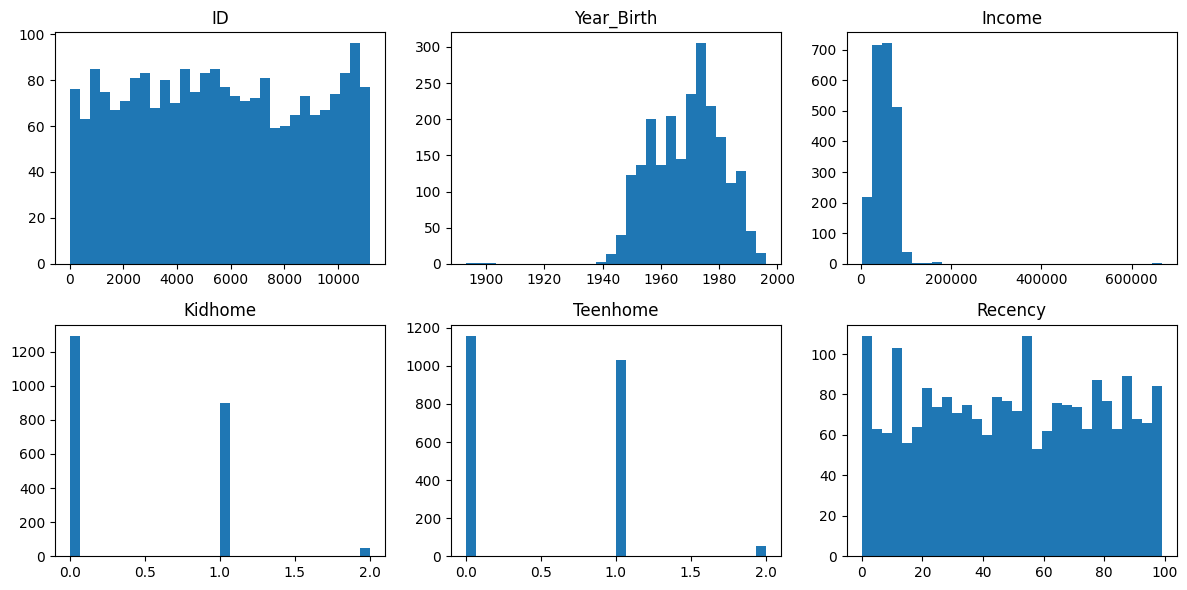

In [7]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(2,3,i)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

# 🧹 Data Preprocessing
The dataset was cleaned and prepared for clustering analysis. The preprocessing
steps included handling missing values, encoding categorical variables,
scaling numerical features, and transforming date information into a numerical
format suitable for machine learning models.


In [8]:
df_prep = df.copy()

In [9]:
df_prep = df_prep.drop(columns=["ID"])

In [10]:
df_prep.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df_prep["Dt_Customer"] = pd.to_datetime(df_prep["Dt_Customer"], dayfirst=True)

In [12]:
df_prep["customer_days"] = (df_prep["Dt_Customer"].max() - df_prep["Dt_Customer"]).dt.days

In [13]:
df_prep = df_prep.drop(columns=["Dt_Customer"])

In [14]:
cat_cols = df_prep.select_dtypes(include="object").columns.tolist()

In [15]:
df_prep = pd.get_dummies(df_prep, columns=cat_cols, drop_first=True)

In [16]:
x = df_prep.copy()

In [17]:
imputer = SimpleImputer(strategy="median")

In [18]:
scaler = StandardScaler()

In [19]:
x = imputer.fit_transform(x)

In [20]:
x = scaler.fit_transform(x)

In [21]:
pca = PCA(n_components=2, random_state=42)

In [22]:
x2 = pca.fit_transform(x)

In [23]:
def cluster_metrics(x, labels):
    if len(set(labels)) < 2:
        return np.nan, np.nan, np.nan

    return (
        silhouette_score(x, labels),
        davies_bouldin_score(x, labels),
        calinski_harabasz_score(x, labels))

def plot_clusters(x2, labels, title):
    plt.figure(figsize=(6,4))
    plt.scatter(x2[:,0], x2[:,1], c=labels, s=12)
    plt.title(title)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()

# 🤖 Model Training
Multiple clustering algorithms were trained to segment customers. The models
used in this project include KMeans, Agglomerative Clustering, and DBSCAN.
## 📊 Dimensionality Reduction using PCA
Principal Component Analysis (PCA) was applied to reduce the dimensionality of
the dataset for visualization purposes while preserving the maximum possible
variance.
## 📐 Elbow Method for Optimal Number of Clusters
The Elbow Method was used to determine the optimal number of clusters for the
KMeans algorithm by plotting the inertia values across different numbers of
clusters.
### Elbow Interpretation
The elbow point is observed where the reduction in inertia begins to slow down.
Based on the elbow plot, **k = 4** was selected as the optimal number of clusters.


In [24]:
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init="auto")
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

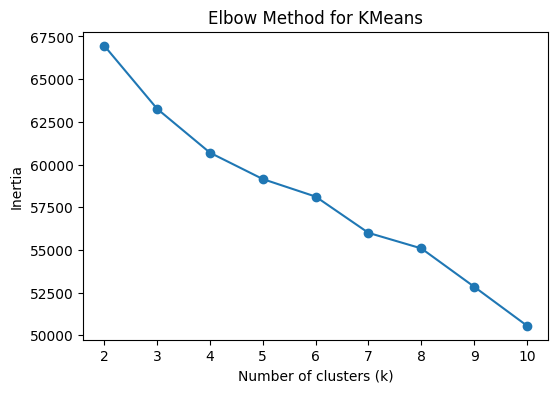

In [25]:
plt.figure(figsize=(6,4))
plt.plot(k_range, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

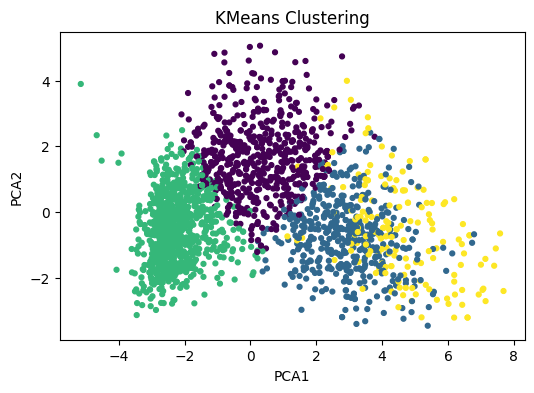

In [26]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
labels_km = kmeans.fit_predict(x)

km_metrics = cluster_metrics(x, labels_km)
plot_clusters(x2, labels_km, "KMeans Clustering")

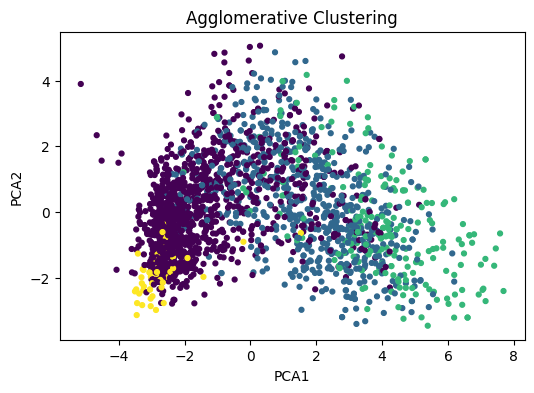

In [27]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=k)
labels_agg = agg.fit_predict(x)

agg_metrics = cluster_metrics(x, labels_agg)
plot_clusters(x2, labels_agg, "Agglomerative Clustering")

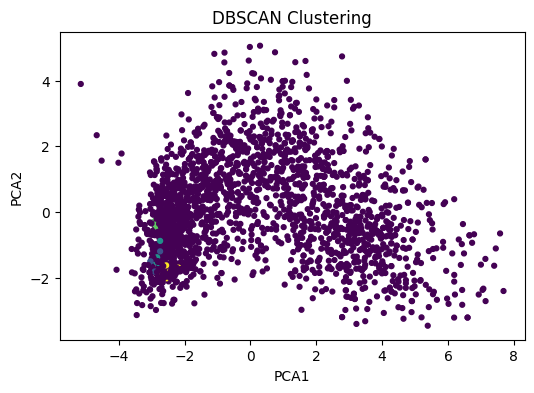

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.1, min_samples=6)
labels_db = dbscan.fit_predict(x)

db_metrics = cluster_metrics(x, labels_db)
plot_clusters(x2, labels_db, "DBSCAN Clustering")

In [29]:
results = pd.DataFrame({
    "Model": ["KMeans", "Agglomerative", "DBSCAN"],
    "Silhouette": [km_metrics[0], agg_metrics[0], db_metrics[0]],
    "Davies_Bouldin": [km_metrics[1], agg_metrics[1], db_metrics[1]],
    "Calinski_Harabasz": [km_metrics[2], agg_metrics[2], db_metrics[2]],
})

results

,Model,Silhouette,Davies_Bouldin,Calinski_Harabasz
0,KMeans,0.116488,2.630210,217.416261
1,Agglomerative,0.116011,2.461609,153.803359
2,DBSCAN,-0.231010,1.573955,3.148512


## 🔍 Clustering Model Comparison

### KMeans
KMeans achieved the highest Calinski–Harabasz score, indicating well-separated
and compact clusters. Although the silhouette score is modest, the clusters are
stable and interpretable.

### Agglomerative Clustering
Agglomerative clustering showed similar performance to KMeans but produced less
distinct clusters based on internal validation metrics.

### DBSCAN
DBSCAN resulted in poor performance for this dataset. The negative silhouette
score indicates overlapping clusters and excessive noise, making DBSCAN less
suitable without extensive parameter tuning.


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib
import pandas as pd

df_prep = df.copy()
df_prep = df_prep.drop(columns=["ID"])

df_prep["Dt_Customer"] = pd.to_datetime(df_prep["Dt_Customer"], dayfirst=True)
df_prep["customer_days"] = (df_prep["Dt_Customer"].max() - df_prep["Dt_Customer"]).dt.days
df_prep = df_prep.drop(columns=["Dt_Customer"])

cat_cols = df_prep.select_dtypes(include="object").columns.tolist()
df_prep = pd.get_dummies(df_prep, columns=cat_cols, drop_first=True)

pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("kmeans", KMeans(n_clusters=4, random_state=42, n_init="auto"))
    ]
)

pipeline.fit(df_prep)

joblib.dump(pipeline, "kmeans_pipeline.joblib")


['kmeans_pipeline.joblib']